**Notebook content:**<br>  
    - Decision tree classifier<br> 
    - Evaluate the classifier tree<br> 
    - Logistic regression VS classification tree<br> 
    - Using entropy as a criterion<br> 
    - Regression tree<br> 
    - Cross validation<br> 
    - Ensemble learning<br> 
    - Bagging and Random forest<br> 
    - Random forest regressor<br> 
    - Visualizing features importances<br> 
    - Adaboost classifier<br> 
    - Gradient boosting<br> 
    - Stochastic gradient boosting(SGB)<br> 
    - Tuning a CART's Hyperparameters

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Trees are able to capture the non-linear relashionships between features and labels

In [41]:
data = pd.read_csv('wbc.csv')
X = data[['radius_mean' ,'concave points_mean']]
y = data['diagnosis'].map({'M':1, 'B':0})
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.3)

In [42]:
dt = DecisionTreeClassifier(max_depth = 6, random_state= 42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_train)
accuracy_score(y_train, y_pred)

0.9748743718592965

In [5]:
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.8771929824561403


In [6]:
# see how the logistic regression will perform with the same data
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_score(y_pred_logreg, y_test)

0.8596491228070176

In [7]:
# build dicision tree model with defining the criterion
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)
y_pred = dt_entropy.predict(X_test)
accuracy_score(y_pred, y_test)

0.847953216374269

In [8]:
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('auto.csv')
encoded = pd.get_dummies(df.origin, prefix='origin')
df = df.join(encoded)
X = df.drop(['mpg', 'origin'], axis=1)
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# Regression example
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
import numpy as np

dt_reg = DecisionTreeRegressor(max_depth= 8,
                              min_samples_leaf= 0.13,
                              random_state= 3)

dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)
mse_dt = mse(y_pred,y_test)
rmse_dt = np.sqrt(mse_dt)
print('Square root mean error: ', rmse_dt)

Square root mean error:  3.703774914790968


**Diagnose bias and variance problems**

In [10]:
from sklearn.model_selection import cross_val_score

mse_cv =  - cross_val_score(dt_reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('Train error: ', mse_cv.mean() ** 0.5)
print('Test error: ', rmse_dt)

Train error:  4.347965938549339
Test error:  3.703774914790968


In [11]:
# another example
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf= 0.26, random_state=1)

**Ensemble Learning**<br>
Voting classifier uses the same training set

In [12]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

In [13]:
data = pd.read_csv('wbc.csv')
X = data[['radius_mean' ,'concave points_mean']]
y = data['diagnosis'].map({'M':1, 'B':0})
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                   random_state=1)

In [14]:
logreg = LogisticRegression(random_state=1)
knn = KNN(n_neighbors=27)
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=1)

classifiers = [('Logistic regression',logreg),
              ('K-neighbors', knn),
              ('Dicision tree', dt)]

In [15]:
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('{:s} : {:3f}'.format(clf_name, accuracy_score(y_pred, y_test)))

Logistic regression : 0.847953
K-neighbors : 0.859649
Dicision tree : 0.906433


In [16]:
# Voting Classifier in sklearn
vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
print('Voting Classifier:' ,accuracy_score(y_pred, y_test))

Voting Classifier: 0.8538011695906432


**Bagging**(Bootstrap aggregation)<br>
Same algorithm trained on different subset of the data<br>
Bagging has the effect of reducing the variance of individual models in the ensemble. 

In [17]:
from sklearn.ensemble import BaggingClassifier

dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=1)
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of bagging classifier :', accuracy)

Accuracy of bagging classifier : 0.9122807017543859


**Out Of Bag (OOB) instances**

In [18]:
# 63% of the training instances are sampled. The remaining 37% that are not sampled constitute what is known as the Out-of-bag or OOB instances.
# OOB-score corresponds to the accuracy for classifiers and the r-squared score for regressors. 

In [19]:
bc = BaggingClassifier(base_estimator=dt, 
                      n_estimators=300,
                      oob_score=True, 
                      n_jobs=-1)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
test_accuracy = accuracy_score(y_pred, y_test)
obb_accuracy = bc.oob_score_
print('Test accuracy: {:.3f}'.format(test_accuracy))
print('OOB accuracy: {:.3f}'.format(obb_accuracy))

Test accuracy: 0.912
OOB accuracy: 0.899


In [20]:
# These results highlight how OOB-evaluation can be an efficient technique to obtain a performance estimate of a bagged-ensemble on unseen data without performing cross-validation. 

**Random Forests (RF)**<br>
- Random Forests is an ensemble method that uses a decision tree as a base estimator. <br>
- Each estimator is trained on a different bootstrap sample having the same size as the <br>
training set. Random forests introduces further randomization than bagging when training each of the base estimators. 
- Features are sampled at each node **without replacement**<br>
- The node is splited using the sampled feature that maximizes information gain.

In [21]:
df = pd.read_csv('auto.csv')
encoded = pd.get_dummies(df.origin, prefix='origin')
df = df.join(encoded)
X = df.drop(['mpg', 'origin'], axis=1)
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400, 
                          min_samples_leaf=0.12,
                          random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rmse = mse(y_pred, y_test) ** 0.5
print('Root mean square error: {:.3f}'.format(rmse))

Root mean square error: 4.038


In [23]:
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)
rmse = mse(y_pred, y_test) ** 0.5
print('Root mean square error: {:.3f}'.format(rmse))

Root mean square error: 4.206


In [24]:
# Feature Importance in sklearn
import matplotlib.pyplot as plt

important_rf = pd.Series(rf.feature_importances_, index=X.columns)
sorted_importences = important_rf.sort_values()

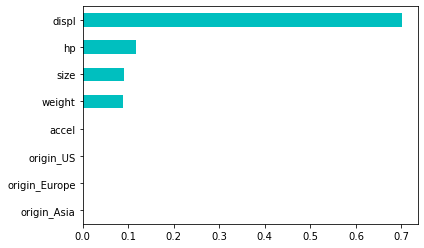

In [25]:
sorted_importences.plot(kind='barh', color='c')
plt.show()

**Boosting**<br>
- AdaBoost(learn using weights)
- Gradient Boosting(learn using residuals)

In [26]:
# AdaBoost
data = pd.read_csv('wbc.csv')
X = data[['radius_mean' ,'concave points_mean']]
y = data['diagnosis'].map({'M':1, 'B':0})
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                   random_state=1)

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

dt = DecisionTreeClassifier(max_depth=1, random_state=1)
ada_boost = AdaBoostClassifier(base_estimator=dt, n_estimators=100)
ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)
roc_auc_score(y_test, y_pred)

0.8816137566137566

In [28]:
# Gradient Boosting (GB)
df = pd.read_csv('auto.csv')
encoded = pd.get_dummies(df.origin, prefix='origin')
df = df.join(encoded)
X = df.drop(['mpg', 'origin'], axis=1)
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(max_depth=1, n_estimators=300, random_state=1)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
mse(y_test, y_pred) ** 0.5

3.6122680865816617

In [30]:
# Stochastic Gradient Boosting (SGB)
from sklearn.ensemble import GradientBoostingRegressor

# Here, the parameter subsample was set to 0.8 in order for each tree to sample 80% of the data for training. 
# Finally, the parameter max_features was set to 0.2 so that each tree uses 20% of available features to perform the best-split. 

sgb = GradientBoostingRegressor(n_estimators=300,
                                max_depth=1,
                                max_features=0.2,
                                subsample=0.8,
                                random_state=1)

sgb.fit(X_train, y_train)
y_pred = sgb.predict(X_test)
mse(y_test, y_pred) ** 0.5

3.489105675817158

**Tuning a CART's Hyperparameters**

- Parameters are learned from data through training; examples of parameters include the split-feature and the split-point of a node in a CART. 
- Hyperparameters are not learned from data; they should be set prior to training. Examples of hyperparameters include the maximum-depth and the splitting-criterion of a CART.

In [31]:
# get all parameters of the decisiontree model
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 1, 'splitter': 'best'}


In [32]:
data = pd.read_csv('wbc.csv')
X = data[['radius_mean' ,'concave points_mean']]
y = data['diagnosis'].map({'M':1, 'B':0})
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.3)

In [33]:
from sklearn.model_selection import GridSearchCV

prams = {
         'max_depth':[3, 4, 5],
         'min_samples_leaf':[0.04, 0.06, 0.08],
         'max_features':[0.2, 0.4, 0.6]
        }
grid_dt = GridSearchCV(estimator=dt, 
                       param_grid = prams, 
                       scoring='accuracy',
                       cv=10,
                       n_jobs=-1)

grid_dt.fit(X_train, y_train)
best_params = grid_dt.best_params_
print(best_params)

{'max_depth': 4, 'max_features': 0.2, 'min_samples_leaf': 0.04}


In [34]:
grid_dt.best_score_

0.929871794871795

In [35]:
best_model = grid_dt.best_estimator_
acc = best_model.score(X_test, y_test)
print(acc)

0.8888888888888888


**Inspecting RF Hyperparameters in sklearn**

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=1)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [37]:
params_rf = {
     'n_estimators':[300, 400, 500],
     'max_depth':[4, 6, 8],
     'min_samples_leaf':[0.1, 0.2],
     'max_features':['log2','sqrt']
 }

grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       cv=3,
                       scoring='neg_mean_squared_error',
                       verbose=1,
                       n_jobs=-1)

In [38]:
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   34.2s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.1, 0.2],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [39]:
grid_rf.best_params_

{'max_depth': 4,
 'max_features': 'log2',
 'min_samples_leaf': 0.1,
 'n_estimators': 300}

In [45]:
best_model = grid_rf.best_estimator_
y_pred = grid_rf.predict(X_test)
rmse = mse(y_test, y_pred) ** 0.5
print(rmse)

0.22517315027353577
